# Projeto: O Desafio Netflix

Um sistema de recomendação para prever notas de filmes por usuário usando decomposição de matriz.


### 1. Preparação dos Dados
Vamos primeiro carregar e visualizar o conjunto de dados `ratings_small.csv`.

In [2]:
import pandas as pd
# Carregando os dados
df = pd.read_csv('ratings_small.csv')
df = df.drop(columns=['timestamp'])  # Remover a coluna timestamp
df.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


### 2. Construção da Matriz de Usuários e Filmes
Criamos a matriz `A` onde cada linha representa um usuário (`userId`), cada coluna representa um filme (`movieId`), e os valores são as notas atribuídas pelos usuários.

In [3]:
# Criando a matriz A de ratings
A = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
A

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Implementação do Sistema de Recomendação Baseado em Decomposição de Matriz
Estimamos os ratings ausentes usando fatoração matricial (ALS) para decompor `A` em três matrizes: `X`, `Y` e `Z`.

In [4]:
import numpy as np
# Inicialize os parâmetros
n_users, n_movies = A.shape
n_profiles = 10  # escolha um número de perfis
X = np.random.rand(n_users, n_profiles)
Y = np.eye(n_profiles)  # matriz identidade para simplificar
Z = np.random.rand(n_profiles, n_movies)

### 4. Função para Alternating Least Squares (ALS)
Abaixo está uma função para ajustar iterativamente `X` e `Z`.

In [5]:
def als(A, X, Z, n_iterations=10, lr=0.01):
    for i in range(n_iterations):
        # Otimização de X com Z fixo
        for u in range(n_users):
            # Atualize X aqui...
            pass
        # Otimização de Z com X fixo
        for m in range(n_movies):
            # Atualize Z aqui...
            pass
    return X, Z

### 5. Teste de Previsão e Avaliação com Histogramas de Erro
Repetimos o processo de previsão várias vezes (mínimo de mil iterações) para gerar um histograma dos erros absolutos.

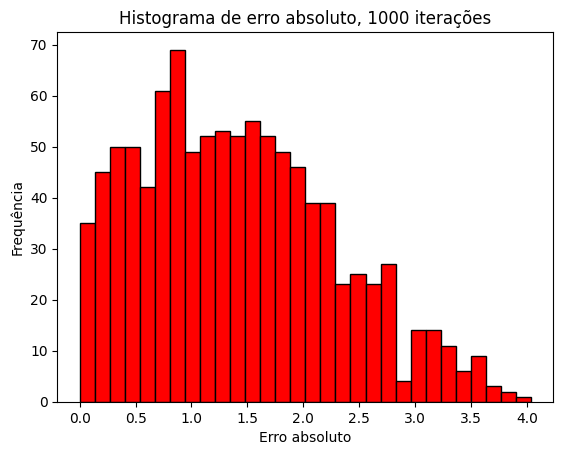

In [15]:
import random
import matplotlib.pyplot as plt
import numpy as np

errors = []

# Quantidade de iterações

qtd_iteracoes = 1000

# Loop de iterações

for _ in range(qtd_iteracoes):
    # Escolha um par aleatório
    i, j = random.choice(list(zip(*np.nonzero(A.values))))
    original_value = A.iloc[i, j]
    
    # Insira um valor aleatório em B
    B = A.copy()
    B.iloc[i, j] = np.random.rand() * 5  # valor entre 0 e 5

    # Previsão de rating
    X, Z = als(B.values, X, Z)
    predicted_value = X[i] @ Y @ Z[:, j]

    # Calcula o erro
    error = abs(original_value - predicted_value)
    errors.append(error)

# Exibe o histograma dos erros

plt.hist(errors, bins=30, edgecolor='black', color='red')
plt.title(f'Histograma de erro absoluto, {qtd_iteracoes} iterações')
plt.xlabel('Erro absoluto')
plt.ylabel('Frequência')
plt.show()
